In [9]:
import numpy as np
import gc
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib as mpl
#from sklearn.neighbors import KDTree
import threading
from numpy import linalg as LA
from sympy import Plane, Point3D
import pandas as pd
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.colors as colors
import matplotlib.cbook as cbook
import math
import copy
import sys
import os
from os.path import isfile, join
from scipy.spatial import cKDTree
from scipy.optimize import curve_fit
import scipy
from scipy import integrate

plt.rcParams['font.weight'] = 'normal'
plt.rcParams['text.usetex']=False
plt.rcParams['font.family']='stixgeneral'
plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['font.size'] = 20
plt.rc('figure', facecolor='w')

## Constants in cgs unites
G=6.67408e-8
H=67.26*3.2408e-20
k_B=1.38064852e-16
M_sun=1.99e+33
pc=3.086e18
kpc=3.086e21
Mpc=3.086e24
Gyr=365*24*3600*1e9
Myr=365*24*3600*1e6
m_p=1.6726219e-24
eV=1.602176634e-12
h_bar=1.0545718e-27
c=2.99792458e10

h=0.6774

## Constants in mks unites
k_B=1.38064852e-23
Gyr=365*24*3600*1e9
Myr=365*24*3600*1e6
m_p=1.6726219e-27
eV=1.602176634e-19
h_bar=1.0545718e-34
c=2.99792458e8

## 1. a)

In [15]:
# declare as double (numpy.float64)
e=np.float64(0.1)
print(type(e), '{:.60f}'.format(e))

<class 'numpy.float64'> 0.100000000000000005551115123125782702118158340454101562500000


The error $\Delta e = 5.55 \times 10^{-18}$ and $\Delta e \,/\,e = 5.55 \times 10^{-17}$.

In [17]:
# declare as single (numpy.float32)
e=np.float32(0.1)
print(type(e), '{:.60f}'.format(e))

<class 'numpy.float32'> 0.100000001490116119384765625000000000000000000000000000000000


If I declare $e$ as single precision, the error $\Delta e = 1.49 \times 10^{-9}$ and $\Delta e \,/\,e = 5.55 \times 10^{-8}$.

## 1. b)

In [44]:
# simple for loop (slower)
n=100
e=1

for i in range(100):
    e=e/2
    if (1+e)==1:
        print('{:.40e}'.format(e))
        break

1.1102230246251565404236316680908203125000e-16


In [45]:
# numpy array (faster)
n=100
e_list=np.power(2.0,-1*np.arange(100))
list_1=np.full(100,1)
index=np.where(list_1==(e_list+list_1))[0]
print('{:.40e}'.format(e_list[index[0]]))

1.1102230246251565404236316680908203125000e-16


The roundoff error $\epsilon = 1.11 \times 10^{-16}$.

## 1. c)

My OS/hardware is Windows/Intel i7-8550U CPU @ 1.80 GHz. 
One of the classmates got the same result in Python 3.7 running on Ubuntu 18.04/Intel Core i7-6700HQ CPU @ 2.60 GHz.
The other classmate got the same result in Python 3.7 running on OS X/Intel Core i5 CPU @ 2.30 GHz.

## 2. a)

In [2]:
def f(x):
    return x**(-3/2)

In [30]:
n=1000
a=1
b=5

# Analytical
I=2*(a**(-0.5)-b**(-0.5))
print(I)

# Numerical
delta_x_list=[]
rec_list=[]
tra_list=[]

for n in range(1000,100000,500):
    x=np.linspace(a,b,n+1)
    delta_x=(b-a)/n
    delta_x_list.append(delta_x)

    # Rectangle rule
    I_rec=0
    for i in range(n):
         I_rec+=f(x[i])*delta_x
    rec_list.append(I_rec-I)


    # Trapezoidal rule
    I_tra=0
    for i in range(n):
         I_tra+=(f(x[i])+f(x[i+1]))/2*delta_x
    tra_list.append(I_tra-I)

1.1055728090000843


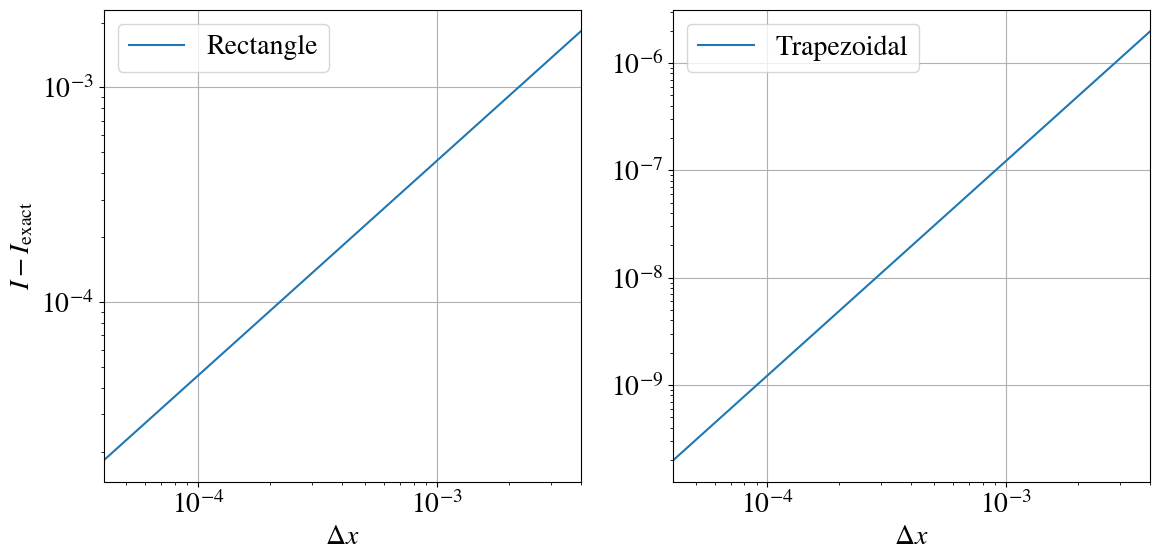

In [4]:
fig=plt.figure(figsize=(12,6),dpi=100)
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ax1.plot(delta_x_list,rec_list,label='Rectangle')
ax2.plot(delta_x_list,tra_list,label='Trapezoidal')

ax1.set_xlim(delta_x_list[-1],delta_x_list[0])
ax2.set_xlim(delta_x_list[-1],delta_x_list[0])
#ax1.set_ylim(0,0.005)
#ax2.set_ylim(0,0.0002)

ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

ax1.set_xlabel('$\Delta x$')
ax2.set_xlabel('$\Delta x$')
ax1.set_ylabel('$I - I_{\mathrm {exact}}$')

plt.tight_layout()

## 2. b)

In [34]:
a=1
b=5

I_scipy=integrate.quad(f, a, b, full_output=1)
print('Info:', I_scipy[2])
print('Value:', '{:.40e}'.format(I_scipy[0]))
print('Error:', '{:.40e}'.format(I_scipy[0]-I))

Info: {'neval': 63, 'last': 2, 'iord': array([       1,        2, 16843009, 16843009, 16777473, 16777472,
       16777472, 16777472, 16777472, 16777472, 16777472, 16777472,
       16777472, 16777472, 16777472, 16777472, 16777472, 16777472,
       16777472, 16777472, 16777472, 16777472, 16777472, 16777472,
       16777472, 16777472, 16777472, 16777472, 16777472, 16777472,
       16777472, 16777472, 16777472, 16777472, 16777472, 16777472,
       16777472, 16777472, 16777472, 16777472, 16777472, 16777472,
       16777472, 16777472, 16777472, 16777472, 16777472, 16777472,
       16777472, 16777472], dtype=int32), 'alist': array([1.00000000e+000, 3.00000000e+000, 1.58101007e-322, 1.58101007e-322,
       2.09507391e-316, 7.90505033e-323, 1.26463493e-316, 3.21142670e-322,
       1.64506706e-316, 6.93071491e-310, 2.17010311e-316, 1.63041663e-322,
       1.64505362e-316, 1.26667523e-316, 6.32404027e-322, 2.37151510e-322,
       2.07167654e-316, 4.94065646e-324, 3.95252517e-323, 3.95252517e-323,

In [43]:
# Trapezoidal rule again
n=100000000
a=1
b=5
x=np.linspace(a,b,n+1)
delta_x=(b-a)/n
delta_x_list.append(delta_x)
    
I_tra=0
for i in range(n):
     I_tra+=(f(x[i])+f(x[i+1]))/2*delta_x
print('Value:', '{:.40e}'.format(I_tra))
print('Trapezoidal - Black-box:', '{:.4e}'.format(I_tra-I_scipy[0]))
print('Step size', '{:.4e}'.format(delta_x))

Value: 1.1055728089996585961074515580548904836178e+00
Trapezoidal - Black-box: -4.2566e-13
Step size 4.0000e-08


*scipy.integrate.quad* routnine interpolates the integral using Gauss–Kronrod quadrature. 
It decides the number of points used for the interpolation and in this case, 63 function points and Gauss-Kronrod 21-point integration are used. 
I am not sure about the order of accuracy but it seems to depend on the problem. 
With 21-point integration, the order of accuracy might be 21.
Even Trapezoidal rule can't match the accuracy of the Black-box *scipy.integrate.quad* routine.
Step size of at least smaller than $4 \times 10^{-8}$ is needed.

## 3. b)

In [6]:
def comoving(z, omega_m, omega_l):
    return (omega_m*(1+z)**3+(1-omega_m-omega_l)*(1+z)**2+omega_l)**(-0.5)

In [45]:
omega_m=0.3
omega_l=0.7
h=0.7
z=2
n=100000

z_list=np.linspace(0,z,n+1)
delta_z=z/n

D_comoving=0
for i in range(n):
     D_comoving+=(comoving(z_list[i],omega_m,omega_l)+comoving(z_list[i+1],omega_m,omega_l))/2*delta_z*3000

print('Redshift: 2')
print(D_comoving, 'Mpc h^{-1}')
print(D_comoving/h, 'Mpc')

Redshift: 2
3628.4136128428017 Mpc h^{-1}
5183.44801834686 Mpc


In [20]:
omega_m=0.3
omega_l=0.7
h=0.7
z_array=np.linspace(0,10,100)
D_comoving_array=[]
n=100000

for j in range(100):
    z=z_array[j]
    z_list=np.linspace(0,z,n+1)
    delta_z=z/n

    D_comoving=0
    for i in range(n):
        D_comoving+=(comoving(z_list[i],omega_m,omega_l)+comoving(z_list[i+1],omega_m,omega_l))/2*delta_z*3000
    D_comoving_array.append(D_comoving/h)

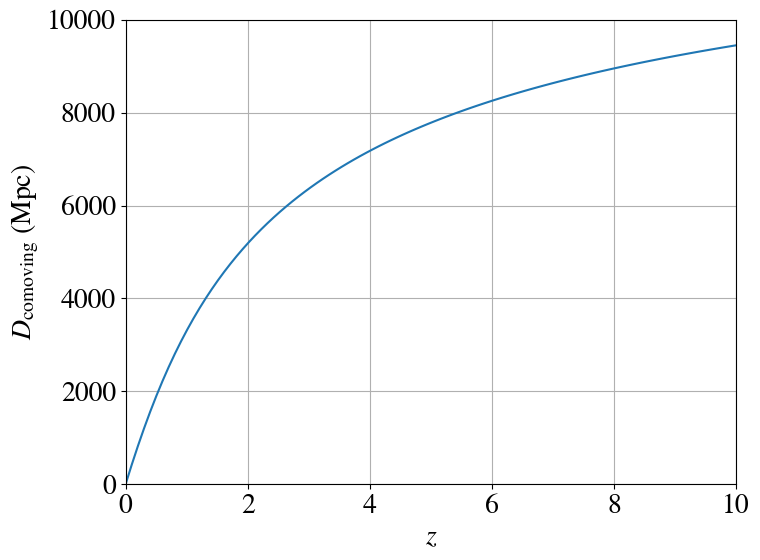

In [47]:
fig=plt.figure(figsize=(8,6),dpi=100)
ax1=fig.add_subplot(111)

ax1.plot(z_array,D_comoving_array)

ax1.set_xlim(0,10)
ax1.set_ylim(0,10000)

ax1.grid()

ax1.set_xlabel('$z$')
ax1.set_ylabel('$D_{\mathrm {comoving}}$ (Mpc)')

plt.tight_layout()